In [ ]:
# Function to format numbers into a properly structured NumPy array
def format_numbers_to_numpy_array(numbers):
    numbers_per_line = 8  # Set how many numbers per line
    formatted_lines = []

    # Split numbers into chunks of `numbers_per_line` and format
    for i in range(0, len(numbers), numbers_per_line):
        line = ", ".join(str(num) for num in numbers[i:i+numbers_per_line])
        formatted_lines.append(line)

    # Join lines and create the final output
    formatted_array = "data = np.array([\n    " + ",\n    ".join(formatted_lines) + "\n])"
    return formatted_array

# ======= ENTER YOUR NUMBERS IN ONE LINE =======
user_input = input("Enter numbers separated by spaces: ")
user_numbers = [float(num) for num in user_input.split()]
# ==============================================

# Generate and print the formatted output
formatted_output = format_numbers_to_numpy_array(user_numbers)
print("\nFormatted NumPy Array:\n")
print(formatted_output)



In [ ]:
# Simple Statistics

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ======= INPUT VALUES =======
data = np.array([
    -0.326946829, -0.25751189, 0.492405892, -0.41995168, 0.580668103, -0.735426041, -0.083070094, -0.196479807,
    -0.520978854, -0.737931037, -0.471216608, -0.721229513, 0.10236602, -0.480470316, -0.754255616, -0.468896165,
    0.188612379, -0.767824503, -0.032057175, 0.300909533, -0.705375995, -0.680359278, 0.35794626, 0.621493296,
    3.451187391, 0.107022731, 0.056904016, -0.099575376, 0.572552677, -0.340171492, -0.669327216, 0.854302604,
    -0.758473684, 2.3756332, 0.717976151, -0.295892382, -0.472868629, -0.738062186, 0.167935943, 1.794323864,
    0.33738246, -0.493824738, -0.063327673, 0.858033413, -0.698268758, 0.586539565, -0.205594208, -0.763953944,
    1.905810464, -0.750866841, 3.56356026, -0.37282416, 0.201145289, -0.367459703, 0.880277037, 0.729278475,
    -0.102745339, -0.202342645, 0.443946974, -0.040939236, 2.899579301, 1.655403377, 1.002857402, -0.214695245,
    -0.675448619, 0.649049694, 1.613778391, 0.268701704, 2.737853981, -0.51245288, -0.217299359, -0.22948122,
    -0.560510112, 1.16253964, -0.421352977, 1.591844099, -0.52783206, -0.179562918, -0.222404423, -0.361560448,
    -0.497570869, -0.760903286, -0.572399161, 0.776995881, 0.926165761, 1.685565554, 0.046330424, -0.476396163,
    2.826608014, -0.378920567, -0.073287767, 4.394573485, -0.759733082, 1.228025456, 2.54915849, -0.36693911,
    -0.695677542, -0.043578409, 0.609155391, -0.286988115, 0.860876898, 0.768580755, -0.763705576, -0.504230973,
    0.011198817, 3.792357719, -0.293202175, -0.600260502, -0.23167066, 0.462963805, -0.723658911, 1.174828466,
    -0.530895071, -0.367898759, -0.139496359, 0.930973029, -0.27701313, 0.499730287, -0.184891436, -0.407961007,
    0.223582557, -0.034594861, 1.377390862, -0.367029143, -0.587463992, 0.177517236, 2.883174467, -0.622892001,
    2.040655401, 0.381422488, 0.686316392, -0.064483526, -0.612217638, -0.713570354, -0.556104172, -0.613495943,
    -0.71065665, -0.185904366, -0.49903783, 0.998274594, 0.334320599, 1.306833099, 1.507055377, 4.01657115,
    -0.645169247, -0.07045487, 1.808777344, 1.672831636, 1.078610369, 1.681794628, -0.240881403, -0.285704283,
    1.525177555, 0.105179873, 1.10364616, -0.240111929, -0.585882774, 3.155120147, 0.577687769, -0.759733082,
    -0.761053952, 0.184725121, -0.491772031, -0.688730669, 1.093710345, -0.748970648, -0.670083628, -0.634249237,
    4.153952826, 0.519348361, 0.549246647, -0.20304653, -0.432295957, 0.717840482, 1.442288008, 0.340880416,
    0.119399272, -0.198579947, 1.957205351, 0.244351437, 0.777982287, 0.03085526, 0.452660989, 0.798627844,
    0.56387026, -0.596464164, -0.493677908, -0.654097744, -0.038134362, -0.626345872, 3.413269412, 2.476812294,
    -0.628408623, 3.734092327, -0.503509531, -0.342432449, -0.603981616, -0.406790715, 0.013805812, -0.253970264,
    -0.445190553, -0.701371331, -0.360317918, -0.244617218, 1.456606029, -0.767824503, 0.001189287, 0.200566177,
    1.43237226, -0.618280647, -0.044435651, -0.743492454, -0.635340164, -0.375398076, -0.580300099, -0.708654602,
    0.594747713, -0.680858022, 0.290416166, -0.684564581, 1.294851937, -0.582485035, -0.088977744, 0.554458344,
    -0.739052477, 0.608295504, -0.396769183, -0.416870774, 1.743330201, 0.106467426, -0.617756677, 0.954913299,
    -0.753421013, 0.13096101, -0.501953856, 0.189313884, 2.043938572, -0.530194085, -0.765238417, 0.103509311,
    -0.335522309, -0.648278235, -0.698632147, 0.141787932, -0.584726153, 0.215939953, -0.413638237, -0.760903286,
    0.39230656, -0.216670026, -0.143075418, -0.763408321, 0.924591133, -0.761053952, 0.760576899, 1.784294284,
    0.647623907, -0.564511011, -0.485176907, -0.575733233, -0.761367857, 0.07790722, -0.753359389, 0.562044925,
    0.387966727, 1.205707638, -0.584194751, -0.498683301, -0.679409763, -0.117798573, -0.726642564, -0.68168827,
    0.41421419, 0.529113359, 0.205697561, 2.831700627, 0.368349606, 1.401515948, -0.106235666, -0.72255154,
    -0.589645882, 0.890813724, -0.637200625, 2.104295554, 0.450314226, -0.301700628, 0.908777039, 0.107714289,
    1.719670646, 1.357603933, 0.983918557, 0.228296601, 0.161408888, 5.394294876, 0.11994431, 0.648497336,
    -0.347028651, -0.065345437, -0.613293222, 2.23418358, 0.122575021, -0.73529677, -0.44086998, 2.730951203,
    0.743335988, -0.025483718, 4.772002425, -0.417368626, 1.044224196, 1.154610819, 0.564760458, -0.694661987,
    2.641478375, 1.901976597, -0.233019918, -0.697206834, 2.33107315, -0.705086443, 0.033360221, 0.835738047,
    -0.344031828, 3.452141384, -0.382360168, -0.739869011, -0.651427813, -0.634679324, -0.142509769, -0.079961557,
    -0.629600676, 1.404679009, -0.751197886, -0.674439212, 3.279425832, -0.767824503, -0.390793205, 3.380747302,
    0.85481433, 0.311702683, 0.657154417, -0.051185257, -0.126075619, 1.905522802, 0.725700211, -0.407748216,
    0.014274826, 0.910171942, 1.977754253, -0.316763725, 0.287804254, -0.21193272, 1.157468581, -0.187199755,
    -0.254315996, 0.114949414, 1.055248479, 0.836752296, 2.039498056, -0.19202741, 1.817296117, -0.069189629,
    -0.105924203, -0.767824503, -0.700186913, -0.763408321, -0.765238417, -0.199762983, 0.531893914, 0.991138566,
    0.681807147, -0.518281366, 2.920983336, -0.019419503, -0.410972127, -0.309118173, 0.693779932, -0.100981677,
    1.917414845, -0.615108656, -0.324266186, 0.124475297, 0.50755017, 5.313842911, 0.255317968, -0.690314051,
    0.187800612, -0.767824503, -0.178753675, 0.367817834, 0.969198464, 0.126913689, -0.152195818, -0.272615053,
    -0.767824503, -0.260119281, 0.201272411, 0.195859806, -0.264517054, -0.103223848, -0.365931838, 1.113643265,
    -0.705428447, 1.815023352, 1.720787856, -0.213479624, -0.678751359, -0.570700751, 0.189751325, -0.576692263,
    0.715706321, 1.125453846, -0.303245226, -0.73572587, 0.554097313, -0.446589174, 0.043490482, -0.249185692,
    -0.638409815, 2.696887666, -0.758054745, -0.579086816, -0.750381582, 0.86551824, 0.747562132, 3.194245106,
    1.912024855, -0.587446024, 0.375227952, -0.109451736, 0.190784415, 1.021185719, -0.180616607, 0.210029739,
    2.231462865, 0.482024612, -0.610837875, -0.111803654, -0.101286329, -0.75953708, 0.247719513, -0.196083337,
    -0.148422251, -0.731820653, 1.819483092, -0.140910782, -0.674094234, -0.283872423, -0.282698627, -0.364657759,
    -0.293128366, -0.517467282, -0.58043808, -0.490591769, -0.662257189, -0.753043207, -0.420103591, 0.261748765,
    0.030378858, 1.454241222, -0.650650867, 2.513040586, -0.453824903, 0.058694119, 1.106460219, -0.04933721,
    -0.057746823, 2.881051315, 0.613463204, 0.114338137, 2.886431932, -0.734413029, 1.843726276, 2.24602398,
    -0.309444545, 0.718399962, -0.699238633, -0.365391062, -0.112941697, 1.29223621, -0.349537795, 0.069705432,
    0.197296362, 0.154179784, -0.438880295, -0.763953944, 0.902252611, -0.102607588, -0.226205124, -0.601542214,
    -0.252845038, -0.71089952, 0.377204887, 1.038986912, -0.728551911, -0.759084682, 0.015042628, 2.502693617,
    0.663812188, -0.737971853, -0.720617606, 0.108503372, -0.642126976, -0.361791899, 0.280062314, 0.252987222,
    -0.439293504, 0.010225542, -0.767824503, 0.804620173, -0.581309716, 0.765712784, 1.975790751, 0.772550244,
    -0.639352695, -0.519253718, -0.462897167, 0.405320791, 1.660193347, 0.884481242, 0.367645772, 0.056678937,
    -0.720904438, -0.597058716, -0.084433167, 1.933956554, 0.14579787, 0.177238724, -0.25067186, 3.385432867,
    0.985256533, -0.76229296, -0.758672479, 0.366011183, -0.742150683, -0.707470811, 0.115059686, -0.002092751,
    -0.112522347, 1.14228979, 0.277895355, 0.514389632, -0.672285915, 0.729357702, 3.289061957, -0.207960364,
    0.67005795, 0.133117108, -0.763953944, 0.328496355, -0.584473103, 0.952851315, 0.821468211, -0.22320546,
    -0.649511566, 2.489344012, -0.717386522
])
# =============================

# Calculate Statistics
mean_val = np.mean(data)
mode_val = stats.mode(data, keepdims=True)[0][0]
std_val = np.std(data, ddof=1)  # Sample std dev
mad_val = np.mean(np.abs(data - mean_val))  # Mean Absolute Deviation (MAD)
iqr_val = stats.iqr(data)  # Interquartile Range (IQR)

# Display results
stats_df = pd.DataFrame({
    "Statistic": ["Mean", "Median", "Mode", "Standard Deviation", "Mean Absolute Deviation", "Interquartile Range"],
    "Value": [mean_val, np.median(data), mode_val, std_val, mad_val, iqr_val]
})
print(stats_df)

# === PLOTS ===

# === HISTOGRAM WITH KDE ===
plt.figure(figsize=(12, 5))
sns.histplot(data, bins=20, kde=True, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Histogram with KDE", fontsize=14, fontweight="bold")
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# === UPDATED BOX PLOT WITH CUSTOM COLORS ===
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(data, patch_artist=True, showmeans=True, meanline=True)

# Adjust colors for the box and lines
line_width = 2.5

for box in boxplot['boxes']:
    box.set(facecolor='red', edgecolor='darkred', linewidth=2)  # Box color

for whisker in boxplot['whiskers']:
    whisker.set(color='darkred', linewidth=2)  # Whisker color

for cap in boxplot['caps']:
    cap.set(color='darkred', linewidth=2)  # Cap color

for line in boxplot['medians']:
    line.set(linewidth=line_width, color='orange')  # Median line color

for line in boxplot['means']:
    line.set(linewidth=line_width, color='blue')  # Mean line color

plt.ylabel("Values", fontsize=12)
plt.title("Customized Box Plot", fontsize=14, fontweight="bold")
plt.grid(True, linestyle='--', alpha=0.6)

# Adding legend for mean and median
import matplotlib.lines as mlines
mean_line = mlines.Line2D([], [], color='blue', linestyle='-', label='Mean', linewidth=line_width)
median_line = mlines.Line2D([], [], color='orange', linestyle='-', label='Median', linewidth=line_width)
plt.legend(handles=[mean_line, median_line], loc='upper right')

plt.show()

In [ ]:
# Distribution Testing
import numpy as np
import scipy.stats as st
import scipy.stats as stats
import pandas as pd

# ======= INPUT VALUES =======
data = np.array([
    -0.326946829, -0.25751189, 0.492405892, -0.41995168, 0.580668103, -0.735426041, -0.083070094, -0.196479807,
    -0.520978854, -0.737931037, -0.471216608, -0.721229513, 0.10236602, -0.480470316, -0.754255616, -0.468896165,
    0.188612379, -0.767824503, -0.032057175, 0.300909533, -0.705375995, -0.680359278, 0.35794626, 0.621493296,
    3.451187391, 0.107022731, 0.056904016, -0.099575376, 0.572552677, -0.340171492, -0.669327216, 0.854302604,
    -0.758473684, 2.3756332, 0.717976151, -0.295892382, -0.472868629, -0.738062186, 0.167935943, 1.794323864,
    0.33738246, -0.493824738, -0.063327673, 0.858033413, -0.698268758, 0.586539565, -0.205594208, -0.763953944,
    1.905810464, -0.750866841, 3.56356026, -0.37282416, 0.201145289, -0.367459703, 0.880277037, 0.729278475,
    -0.102745339, -0.202342645, 0.443946974, -0.040939236, 2.899579301, 1.655403377, 1.002857402, -0.214695245,
    -0.675448619, 0.649049694, 1.613778391, 0.268701704, 2.737853981, -0.51245288, -0.217299359, -0.22948122,
    -0.560510112, 1.16253964, -0.421352977, 1.591844099, -0.52783206, -0.179562918, -0.222404423, -0.361560448,
    -0.497570869, -0.760903286, -0.572399161, 0.776995881, 0.926165761, 1.685565554, 0.046330424, -0.476396163,
    2.826608014, -0.378920567, -0.073287767, 4.394573485, -0.759733082, 1.228025456, 2.54915849, -0.36693911,
    -0.695677542, -0.043578409, 0.609155391, -0.286988115, 0.860876898, 0.768580755, -0.763705576, -0.504230973,
    0.011198817, 3.792357719, -0.293202175, -0.600260502, -0.23167066, 0.462963805, -0.723658911, 1.174828466,
    -0.530895071, -0.367898759, -0.139496359, 0.930973029, -0.27701313, 0.499730287, -0.184891436, -0.407961007,
    0.223582557, -0.034594861, 1.377390862, -0.367029143, -0.587463992, 0.177517236, 2.883174467, -0.622892001,
    2.040655401, 0.381422488, 0.686316392, -0.064483526, -0.612217638, -0.713570354, -0.556104172, -0.613495943,
    -0.71065665, -0.185904366, -0.49903783, 0.998274594, 0.334320599, 1.306833099, 1.507055377, 4.01657115,
    -0.645169247, -0.07045487, 1.808777344, 1.672831636, 1.078610369, 1.681794628, -0.240881403, -0.285704283,
    1.525177555, 0.105179873, 1.10364616, -0.240111929, -0.585882774, 3.155120147, 0.577687769, -0.759733082,
    -0.761053952, 0.184725121, -0.491772031, -0.688730669, 1.093710345, -0.748970648, -0.670083628, -0.634249237,
    4.153952826, 0.519348361, 0.549246647, -0.20304653, -0.432295957, 0.717840482, 1.442288008, 0.340880416,
    0.119399272, -0.198579947, 1.957205351, 0.244351437, 0.777982287, 0.03085526, 0.452660989, 0.798627844,
    0.56387026, -0.596464164, -0.493677908, -0.654097744, -0.038134362, -0.626345872, 3.413269412, 2.476812294,
    -0.628408623, 3.734092327, -0.503509531, -0.342432449, -0.603981616, -0.406790715, 0.013805812, -0.253970264,
    -0.445190553, -0.701371331, -0.360317918, -0.244617218, 1.456606029, -0.767824503, 0.001189287, 0.200566177,
    1.43237226, -0.618280647, -0.044435651, -0.743492454, -0.635340164, -0.375398076, -0.580300099, -0.708654602,
    0.594747713, -0.680858022, 0.290416166, -0.684564581, 1.294851937, -0.582485035, -0.088977744, 0.554458344,
    -0.739052477, 0.608295504, -0.396769183, -0.416870774, 1.743330201, 0.106467426, -0.617756677, 0.954913299,
    -0.753421013, 0.13096101, -0.501953856, 0.189313884, 2.043938572, -0.530194085, -0.765238417, 0.103509311,
    -0.335522309, -0.648278235, -0.698632147, 0.141787932, -0.584726153, 0.215939953, -0.413638237, -0.760903286,
    0.39230656, -0.216670026, -0.143075418, -0.763408321, 0.924591133, -0.761053952, 0.760576899, 1.784294284,
    0.647623907, -0.564511011, -0.485176907, -0.575733233, -0.761367857, 0.07790722, -0.753359389, 0.562044925,
    0.387966727, 1.205707638, -0.584194751, -0.498683301, -0.679409763, -0.117798573, -0.726642564, -0.68168827,
    0.41421419, 0.529113359, 0.205697561, 2.831700627, 0.368349606, 1.401515948, -0.106235666, -0.72255154,
    -0.589645882, 0.890813724, -0.637200625, 2.104295554, 0.450314226, -0.301700628, 0.908777039, 0.107714289,
    1.719670646, 1.357603933, 0.983918557, 0.228296601, 0.161408888, 5.394294876, 0.11994431, 0.648497336,
    -0.347028651, -0.065345437, -0.613293222, 2.23418358, 0.122575021, -0.73529677, -0.44086998, 2.730951203,
    0.743335988, -0.025483718, 4.772002425, -0.417368626, 1.044224196, 1.154610819, 0.564760458, -0.694661987,
    2.641478375, 1.901976597, -0.233019918, -0.697206834, 2.33107315, -0.705086443, 0.033360221, 0.835738047,
    -0.344031828, 3.452141384, -0.382360168, -0.739869011, -0.651427813, -0.634679324, -0.142509769, -0.079961557,
    -0.629600676, 1.404679009, -0.751197886, -0.674439212, 3.279425832, -0.767824503, -0.390793205, 3.380747302,
    0.85481433, 0.311702683, 0.657154417, -0.051185257, -0.126075619, 1.905522802, 0.725700211, -0.407748216,
    0.014274826, 0.910171942, 1.977754253, -0.316763725, 0.287804254, -0.21193272, 1.157468581, -0.187199755,
    -0.254315996, 0.114949414, 1.055248479, 0.836752296, 2.039498056, -0.19202741, 1.817296117, -0.069189629,
    -0.105924203, -0.767824503, -0.700186913, -0.763408321, -0.765238417, -0.199762983, 0.531893914, 0.991138566,
    0.681807147, -0.518281366, 2.920983336, -0.019419503, -0.410972127, -0.309118173, 0.693779932, -0.100981677,
    1.917414845, -0.615108656, -0.324266186, 0.124475297, 0.50755017, 5.313842911, 0.255317968, -0.690314051,
    0.187800612, -0.767824503, -0.178753675, 0.367817834, 0.969198464, 0.126913689, -0.152195818, -0.272615053,
    -0.767824503, -0.260119281, 0.201272411, 0.195859806, -0.264517054, -0.103223848, -0.365931838, 1.113643265,
    -0.705428447, 1.815023352, 1.720787856, -0.213479624, -0.678751359, -0.570700751, 0.189751325, -0.576692263,
    0.715706321, 1.125453846, -0.303245226, -0.73572587, 0.554097313, -0.446589174, 0.043490482, -0.249185692,
    -0.638409815, 2.696887666, -0.758054745, -0.579086816, -0.750381582, 0.86551824, 0.747562132, 3.194245106,
    1.912024855, -0.587446024, 0.375227952, -0.109451736, 0.190784415, 1.021185719, -0.180616607, 0.210029739,
    2.231462865, 0.482024612, -0.610837875, -0.111803654, -0.101286329, -0.75953708, 0.247719513, -0.196083337,
    -0.148422251, -0.731820653, 1.819483092, -0.140910782, -0.674094234, -0.283872423, -0.282698627, -0.364657759,
    -0.293128366, -0.517467282, -0.58043808, -0.490591769, -0.662257189, -0.753043207, -0.420103591, 0.261748765,
    0.030378858, 1.454241222, -0.650650867, 2.513040586, -0.453824903, 0.058694119, 1.106460219, -0.04933721,
    -0.057746823, 2.881051315, 0.613463204, 0.114338137, 2.886431932, -0.734413029, 1.843726276, 2.24602398,
    -0.309444545, 0.718399962, -0.699238633, -0.365391062, -0.112941697, 1.29223621, -0.349537795, 0.069705432,
    0.197296362, 0.154179784, -0.438880295, -0.763953944, 0.902252611, -0.102607588, -0.226205124, -0.601542214,
    -0.252845038, -0.71089952, 0.377204887, 1.038986912, -0.728551911, -0.759084682, 0.015042628, 2.502693617,
    0.663812188, -0.737971853, -0.720617606, 0.108503372, -0.642126976, -0.361791899, 0.280062314, 0.252987222,
    -0.439293504, 0.010225542, -0.767824503, 0.804620173, -0.581309716, 0.765712784, 1.975790751, 0.772550244,
    -0.639352695, -0.519253718, -0.462897167, 0.405320791, 1.660193347, 0.884481242, 0.367645772, 0.056678937,
    -0.720904438, -0.597058716, -0.084433167, 1.933956554, 0.14579787, 0.177238724, -0.25067186, 3.385432867,
    0.985256533, -0.76229296, -0.758672479, 0.366011183, -0.742150683, -0.707470811, 0.115059686, -0.002092751,
    -0.112522347, 1.14228979, 0.277895355, 0.514389632, -0.672285915, 0.729357702, 3.289061957, -0.207960364,
    0.67005795, 0.133117108, -0.763953944, 0.328496355, -0.584473103, 0.952851315, 0.821468211, -0.22320546,
    -0.649511566, 2.489344012, -0.717386522
])
# =============================

# List of distributions to check
distributions = [
    "norm", "expon", "gamma", "beta", "lognorm", "weibull_min", "weibull_max",
    "t", "chi2", "pearson3", "rayleigh", "triang", "uniform", "genextreme"
]

# Fit each distribution and calculate goodness of fit
results = {}
for dist_name in distributions:
    dist = getattr(st, dist_name)
    params = dist.fit(data)
    
    # Perform the KS test
    ks_stat, ks_p_value = stats.kstest(data, dist.cdf, args=params)
    results[dist_name] = ks_p_value  # Higher p-value indicates better fit

# Sort results by best fit (highest p-value)
best_fits = sorted(results.items(), key=lambda x: x[1], reverse=True)

# Create a DataFrame to display results
df_best_fits = pd.DataFrame(best_fits, columns=["Distribution", "p-value"])

# Define significance level
alpha = 0.05

# Convert p-values to full decimal representation (no scientific notation)
df_best_fits["p-value"] = df_best_fits["p-value"].apply(lambda x: f"{x:.7f}")

# Add a column to indicate whether p-value is below alpha
df_best_fits["Significant (p < 0.05)"] = df_best_fits["p-value"].astype(float) < alpha

# Display the results in a structured way
print("\nBest Fitting Distributions (with Alpha = 0.05):\n")
print(df_best_fits.to_string(index=False))




In [ ]:
# Elegant Q-Q Plot

# Re-import necessary libraries after execution state reset
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# ======= INPUT YOUR VALUES HERE =======
data = np.array([
    3.451187391, 2.3756332, 1.794323864, 3.56356026, 2.899579301, 1.16253964, 0.776995881, 4.394573485,
    1.228025456, 2.54915849, 2.040655401, 4.01657115, 0.717840482, 1.442288008, 1.957205351, 0.452660989,
    3.413269412, 3.734092327, 1.719670646, 0.983918557, 5.394294876, 2.23418358, 4.772002425, 0.564760458,
    2.33107315, -0.316763725, 2.920983336, 5.313842911, 0.554097313, 2.696887666, 1.454241222, 2.886431932,
    1.29223621, -0.71089952, 3.385432867, 0.366011183, 3.289061957, 0.952851315
])
# ======================================

# Create a Q-Q plot
fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(data, dist="rayleigh", plot=ax)

# Customize the plot for elegance
ax.get_lines()[1].set_linestyle('--')  # Set the Q-Q line to dashed
ax.get_lines()[1].set_linewidth(2)  # Increase line width
ax.get_lines()[1].set_color("red")  # Set Q-Q line color
ax.get_lines()[0].set_marker("o")  # Set data points as circles
ax.get_lines()[0].set_markerfacecolor("black")  # Set marker fill color
ax.get_lines()[0].set_markeredgecolor("black")  # Set marker edge color
ax.get_lines()[0].set_alpha(0.7)  # Adjust transparency

# Set labels and title
ax.set_title("Ho - GEV Q-Q Plot", fontsize=14, fontweight="bold")
ax.set_xlabel("Theoretical Rayleigh Quantiles", fontsize=12)
ax.set_ylabel("Sample Quantiles", fontsize=12)

# Show the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
# Let's try fitting GEV distribution with proper parameters

# Create a Q-Q plot with GEV distribution



In [ ]:
# GEV Distribution

import numpy as np
from scipy.stats import genextreme

# ======= INPUT YOUR VALUES HERE =======
data = np.array([
    3.500159, 3.55999, 3.514057, 3.4647, 3.57089, 3.464309, 3.566933, 3.55471,
    3.568643, 3.553913, 3.568094, 3.559817, 3.577765, 3.503665, 3.533615, 3.539395,
    3.562397, 3.571442, 3.560833, 3.559311, 3.547055, 3.550639, 3.566067, 3.521145,
    3.57092, 3.477041, 3.571714, 3.564849, 3.578658, 3.580137, 3.559407, 3.556082,
    3.573784, 3.511004, 3.539981, 3.557625, 3.557444, 3.472689
])
# ======================================

# Fit GEV distribution to the data
gev_params = genextreme.fit(data)

# Compute standardized values using the GEV CDF
standardized_values = genextreme.cdf(data, *gev_params)

# Fit GEV to the data
gev_params = genextreme.fit(data)

# Extract estimated parameters
k, mu, sigma = gev_params

print(gev_params)

# Print Standardized Values
print("Standardized Values (0-1):")
print(standardized_values)

# Fit Generalized Extreme Value (GEV) distribution to data
gev_params = stats.genextreme.fit(data)

# Generate fitted GEV PDF for visualization
x = np.linspace(min(data), max(data), 100)
gev_pdf = stats.genextreme.pdf(x, *gev_params)

# Plot histogram and fitted GEV PDF
plt.figure(figsize=(8, 5))
sns.histplot(data, bins=10, kde=False, color="skyblue", edgecolor="black", label="Data Histogram", stat="density")
plt.plot(x, gev_pdf, 'r-', label="Fitted GEV PDF", linewidth=2)
plt.title("Ho GEV Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.show()


In [ ]:
# Elegant GEV Q-Q Plot with Circular Markers for GEV

# Re-import necessary libraries after execution state reset
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# ======= INPUT YOUR VALUES HERE =======
data = np.array([
    3.500159, 3.55999, 3.514057, 3.4647, 3.57089, 3.464309, 3.566933, 3.55471,
    3.568643, 3.553913, 3.568094, 3.559817, 3.577765, 3.503665, 3.533615, 3.539395,
    3.562397, 3.571442, 3.560833, 3.559311, 3.547055, 3.550639, 3.566067, 3.521145,
    3.57092, 3.477041, 3.571714, 3.564849, 3.578658, 3.580137, 3.559407, 3.556082,
    3.573784, 3.511004, 3.539981, 3.557625, 3.557444, 3.472689
])
# ======================================

# Fit GEV distribution to data
gev_params = stats.genextreme.fit(data)
k, mu, sigma = gev_params

# Generate theoretical quantiles from a GEV distribution
theoretical_quantiles = np.linspace(0.01, 0.99, len(data))  # Probability levels
gev_quantiles = stats.genextreme.ppf(theoretical_quantiles, k, loc=mu, scale=sigma)

# Sort data for empirical quantiles
sorted_data = np.sort(data)

# Create custom Q-Q plot for GEV
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(gev_quantiles, sorted_data, color="black", edgecolor="black", alpha=0.7, marker="o", label="Empirical Data") # Circular markers
ax.plot(gev_quantiles, gev_quantiles, 'r--', linewidth=2, label="GEV Theoretical Line")  # Reference Line

# Customize the plot for elegance
ax.set_title("Ho - GEV Q-Q Plot", fontsize=14, fontweight="bold")
ax.set_xlabel("Theoretical GEV Quantiles", fontsize=12)
ax.set_ylabel("Sample Quantiles", fontsize=12)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


In [ ]:
# Rayleigh Distribution

# Re-import necessary libraries after execution state reset
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data values
data = np.array([
    2.92578, 3.03688, 3.1268, 3.0095, 2.53176, 2.747, 2.50877, 3.1198,
    2.76122, 2.84098, 2.6669, 2.37117, 2.50096, 2.75852, 2.57682, 2.46565,
    2.48982, 2.61202, 2.82654, 2.52558, 2.54166, 2.73173, 2.90558, 2.86222,
    2.61846, 2.75537, 2.36869, 3.10717, 2.57451, 2.75675, 2.62672, 2.79739,
    2.60639, 2.36509, 2.86918, 2.46784, 2.50703, 2.48816
])

# Fit Rayleigh distribution to data
rayleigh_params = stats.rayleigh.fit(data)

# Perform KS test for Rayleigh distribution
ks_stat, ks_p_value = stats.kstest(data, 'rayleigh', args=rayleigh_params)

# Generate fitted Rayleigh PDF for visualization
x = np.linspace(min(data), max(data), 100)
rayleigh_pdf = stats.rayleigh.pdf(x, *rayleigh_params)

# Plot histogram and fitted Rayleigh PDF
plt.figure(figsize=(8, 5))
sns.histplot(data, bins=10, kde=True, color="skyblue", edgecolor="black", label="Data Histogram", stat="density")
plt.plot(x, rayleigh_pdf, 'r-', label="Fitted Rayleigh PDF", linewidth=2)
plt.title("K - Rayleigh Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.show()

# Compute Rayleigh CDF-based scores (standardized values between 0 and 1)
rayleigh_scores = stats.rayleigh.cdf(data, *rayleigh_params)

# Create a DataFrame to display results
df_rayleigh_scores = pd.DataFrame({"Original Values": data, "Rayleigh Standardized Score": rayleigh_scores})

# Display results in a structured format
print("\nRayleigh Standardized Scores:\n")
print(df_rayleigh_scores.to_string(index=False))

# Display KS test results
print("\nKolmogorov-Smirnov (KS) Test Results:")
print(f"Rayleigh Scale Parameter (σ): {rayleigh_params[1]:.6f}")
print(f"KS Test Statistic: {ks_stat:.6f}")
print(f"KS Test p-value: {ks_p_value:.6f}")


In [ ]:
# t-student Distribution (for l, street length)
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Given dataset
data = np.array([
    36.14, 41.97, 49.31, 49.14, 34.96, 46.62, 44.76, 73.63, 48.79, 60.45,
    40.59, 37.03, 34.20, 35.88, 46.20, 40.42, 39.37, 26.45, 43.87, 36.71,
    38.00, 49.20, 46.20, 42.95, 47.24, 54.21, 33.37, 43.56, 38.95, 48.06,
    53.48, 43.26, 37.63, 36.03, 50.08, 44.91, 31.28, 44.25
])

# Compute mean and standard deviation
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # Using ddof=1 for sample standard deviation
n = len(data)
df = n - 1  # Degrees of freedom

# Fit a t-distribution to the sample
t_fit_params = stats.t.fit(data)
t_dist = stats.t(*t_fit_params)

# Fit a normal distribution for comparison
norm_fit_params = stats.norm.fit(data)
norm_dist = stats.norm(*norm_fit_params)

# Compute t-scores for each data point
t_scores = (data - sample_mean) / (sample_std / np.sqrt(n))

# Compute Min-Max Scaled t-scores (Reversed)
t_min = np.min(t_scores)
t_max = np.max(t_scores)
t_scaled_reversed = 1 - (t_scores - t_min) / (t_max - t_min)

# Compute Reversed CDF values based on t-distribution
cdf_t_distribution = stats.t.cdf(t_scores, df)
reversed_cdf_t_distribution = 1 - cdf_t_distribution

# Create a table with values, t-scores, min-max reversed, and reversed CDF
t_score_table = pd.DataFrame({
    "Value": data,
    "t-Score": t_scores,
    "Min-Max Reversed (0-1)": t_scaled_reversed,
    "Reversed Cumulative Distribution Function": reversed_cdf_t_distribution
})

# Print table in a copy-friendly format
print("\n--- T-Score Table with Min-Max Reversed and Reversed CDF ---\n")
print(t_score_table.to_string(index=False))

# Display statistical results in a separate, copy-friendly format
print("\n--- Statistical Summary ---\n")
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Std Dev: {sample_std:.2f}")
print(f"Degrees of Freedom: {df}")
print(f"KS Test Statistic: {stats.kstest(data, 't', args=t_fit_params).statistic:.4f}")
print(f"KS Test P-Value: {stats.kstest(data, 't', args=t_fit_params).pvalue:.4f}")

# Create a histogram and overlay with the KDE density line and fitted t-distribution
plt.figure(figsize=(10, 6))

# Histogram with KDE (Kernel Density Estimation)
sns.histplot(data, bins=10, kde=True, stat="density", color="skyblue", edgecolor="black", label="Histogram")

# Faded KDE Density Line
sns.kdeplot(data, color="blue", linewidth=2, alpha=0.3, label="KDE Density")

# Overlay fitted t-distribution
x = np.linspace(min(data), max(data), 100)
plt.plot(x, t_dist.pdf(x), 'r-', label="Fitted t-Distribution", linewidth=2)
plt.plot(x, norm_dist.pdf(x), 'g--', label="Fitted Normal Distribution", linewidth=2)  # Added green dashed line

# Labels and title
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Histogram with Fitted t-Distribution and Normal Distribution")
plt.legend()
plt.grid(True)
plt.show()

# Compute the correct theoretical quantiles for the t-distribution based on the dataset
probabilities = (np.arange(1, n + 1) - 0.5) / n  # Compute empirical probabilities
t_theoretical_quantiles = stats.t.ppf(probabilities, df)  # Compute t-distribution quantiles
sorted_sample_quantiles = np.sort(data)  # Sort actual data values for comparison

# Create the correct Q-Q plot based on the dataset
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(t_theoretical_quantiles, sorted_sample_quantiles, color="black", edgecolor="black", alpha=0.7, marker="o", label="Empirical Data")  # Circular markers
ax.plot(t_theoretical_quantiles, np.mean(sorted_sample_quantiles) + np.std(sorted_sample_quantiles) * t_theoretical_quantiles, 'r--', linewidth=2, label="T-Theoretical Line")  # Reference Line

# Customize the plot to match the dataset
ax.set_title("l - t-student Q-Q Plot Based on Dataset", fontsize=14, fontweight="bold")
ax.set_xlabel("Theoretical T-Student Quantiles", fontsize=12)
ax.set_ylabel("Sample Quantiles", fontsize=12)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

# Show the correct Q-Q plot
plt.show()


In [ ]:
# t-student Distribution (for phi, Variation of Blocks' Shape)

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Given dataset
data = np.array([
    0.315, 0.27, 0.202, 0.281, 0.276, 0.261, 0.255, 0.258,
    0.242, 0.225, 0.273, 0.232, 0.284, 0.265, 0.269, 0.24,
    0.282, 0.316, 0.273, 0.261, 0.225, 0.274, 0.269, 0.307,
    0.272, 0.193, 0.272, 0.212, 0.242, 0.296, 0.244, 0.365,
    0.278, 0.227, 0.26, 0.258, 0.295, 0.243
])

# Compute mean and standard deviation
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # Using ddof=1 for sample standard deviation
n = len(data)
df = n - 1  # Degrees of freedom

# Fit a t-distribution to the sample
t_fit_params = stats.t.fit(data)
t_dist = stats.t(*t_fit_params)

# Fit a normal distribution for comparison
norm_fit_params = stats.norm.fit(data)
norm_dist = stats.norm(*norm_fit_params)

# Compute t-scores for each data point
t_scores = (data - sample_mean) / (sample_std / np.sqrt(n))

# Compute Min-Max Scaled t-scores (Standard, not reversed)
t_min = np.min(t_scores)
t_max = np.max(t_scores)
t_scaled = (t_scores - t_min) / (t_max - t_min)

# Compute CDF values based on t-distribution (Standard, not reversed)
cdf_t_distribution = stats.t.cdf(t_scores, df)

# Create a table with values, t-scores, min-max, and CDF
t_score_table = pd.DataFrame({
    "Value": data,
    "t-Score": t_scores,
    "Min-Max Scaled (0-1)": t_scaled,
    "Cumulative Distribution Function": cdf_t_distribution
})

# Print table in a copy-friendly format
print("\n--- T-Score Table with Min-Max Scaled and CDF ---\n")
print(t_score_table.to_string(index=False))

# Display statistical results in a separate, copy-friendly format
print("\n--- Statistical Summary ---\n")
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Std Dev: {sample_std:.2f}")
print(f"Degrees of Freedom: {df}")
print(f"KS Test Statistic: {stats.kstest(data, 't', args=t_fit_params).statistic:.4f}")
print(f"KS Test P-Value: {stats.kstest(data, 't', args=t_fit_params).pvalue:.4f}")

# Create a histogram and overlay with the KDE density line and fitted t-distribution
plt.figure(figsize=(10, 6))

# Histogram with KDE (Kernel Density Estimation)
sns.histplot(data, bins=10, kde=True, stat="density", color="skyblue", edgecolor="black", label="Histogram")

# Faded KDE Density Line
sns.kdeplot(data, color="blue", linewidth=2, alpha=0.3, label="KDE Density")

# Overlay fitted t-distribution
x = np.linspace(min(data), max(data), 100)
plt.plot(x, t_dist.pdf(x), 'r-', label="Fitted t-Distribution", linewidth=2)
plt.plot(x, norm_dist.pdf(x), 'g--', label="Fitted Normal Distribution", linewidth=2)  # Added green dashed line

# Labels and title
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Histogram with Fitted t-Distribution and Normal Distribution")
plt.legend()
plt.grid(True)
plt.show()

# Compute the correct theoretical quantiles for the t-distribution based on the dataset
probabilities = (np.arange(1, n + 1) - 0.5) / n  # Compute empirical probabilities
t_theoretical_quantiles = stats.t.ppf(probabilities, df)  # Compute t-distribution quantiles
sorted_sample_quantiles = np.sort(data)  # Sort actual data values for comparison

# Create the correct Q-Q plot based on the dataset
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(t_theoretical_quantiles, sorted_sample_quantiles, color="black", edgecolor="black", alpha=0.7, marker="o", label="Empirical Data")  # Circular markers
ax.plot(t_theoretical_quantiles, np.mean(sorted_sample_quantiles) + np.std(sorted_sample_quantiles) * t_theoretical_quantiles, 'r--', linewidth=2, label="T-Theoretical Line")  # Reference Line

# Customize the plot to match the dataset
ax.set_title("Φ - t-student Q-Q Plot Based on Dataset", fontsize=14, fontweight="bold")
ax.set_xlabel("Theoretical T-Student Quantiles", fontsize=12)
ax.set_ylabel("Sample Quantiles", fontsize=12)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

# Show the correct Q-Q plot
plt.show()


In [ ]:
# Pearson Case III for Simulated Circuity

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Given dataset
data = np.array([
    0.10831, 0.21924, 0.81179, 0.78671, 0.30469, 0.16048, 0.35729, 0.31186,
    0.3044, 0.11636, 0.03954, 0.17388, 0.78737, 0.60585, 0.10655, -0.09026,
    0.24023, 0.02113, 0.42724, 0.25289, 0.16513, 0.55938, 0.23967, -0.00117,
    0.30974, 0.27351, 0.23527, 0.53857, 0.03071, 0.48145, 0.26133, 0.27044,
    -0.04342, 0.4299, 0.49508, 0.47382, 0.23189, 0.30807
])

# Compute mean and standard deviation
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # Using ddof=1 for sample standard deviation
n = len(data)
df = n - 1  # Degrees of freedom

# Fit a Pearson Type III distribution to the sample
pearson3_fit_params = stats.pearson3.fit(data)
pearson3_dist = stats.pearson3(*pearson3_fit_params)

# Extract shape, location, and scale parameters
shape_param, location_param, scale_param = pearson3_fit_params

# Print the parameters
print("\n--- Pearson Type III Distribution Parameters ---\n")
print(f"Shape Parameter (α): {shape_param:.6f}")
print(f"Location Parameter (θ): {location_param:.6f}")
print(f"Scale Parameter (β): {scale_param:.6f}")

# Fit a normal distribution for comparison
norm_fit_params = stats.norm.fit(data)
norm_dist = stats.norm(*norm_fit_params)

# Compute Pearson Type III scores for each data point
pearson3_scores = (data - sample_mean) / (sample_std / np.sqrt(n))

# Compute Min-Max Scaled Pearson Type III scores (Standard, not reversed)
p3_min = np.min(pearson3_scores)
p3_max = np.max(pearson3_scores)
p3_scaled = (pearson3_scores - p3_min) / (p3_max - p3_min)

# Compute CDF values based on Pearson Type III distribution
cdf_pearson3_distribution = stats.pearson3.cdf(pearson3_scores, *pearson3_fit_params)

# Create a table with values, Pearson Type III scores, min-max, and CDF
p3_score_table = pd.DataFrame({
    "Value": data,
    "Pearson Type III Score": pearson3_scores,
    "Min-Max Scaled (0-1)": p3_scaled,
    "Cumulative Distribution Function": cdf_pearson3_distribution
})

# Print table in a copy-friendly format
print("\n--- Pearson Type III Score Table with Min-Max Scaled and CDF ---\n")
print(p3_score_table.to_string(index=False))

# Display statistical results in a separate, copy-friendly format
print("\n--- Statistical Summary ---\n")
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Std Dev: {sample_std:.2f}")
print(f"Degrees of Freedom: {df}")
print(f"KS Test Statistic: {stats.kstest(data, 'pearson3', args=pearson3_fit_params).statistic:.4f}")
print(f"KS Test P-Value: {stats.kstest(data, 'pearson3', args=pearson3_fit_params).pvalue:.4f}")

# Create a histogram and overlay with the KDE density line and fitted Pearson Type III distribution
plt.figure(figsize=(10, 6))

# Histogram with KDE (Kernel Density Estimation)
sns.histplot(data, bins=10, kde=True, stat="density", color="skyblue", edgecolor="black", label="Histogram")

# Faded KDE Density Line
sns.kdeplot(data, color="blue", linewidth=2, alpha=0.3, label="KDE Density")

# Overlay fitted Pearson Type III distribution
x = np.linspace(min(data), max(data), 100)
plt.plot(x, pearson3_dist.pdf(x), 'r-', label="Fitted Pearson Type III", linewidth=2)
plt.plot(x, norm_dist.pdf(x), 'g--', label="Fitted Normal Distribution", linewidth=2)  # Added green dashed line

# Labels and title
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Histogram with Fitted Pearson Type III and Normal Distribution")
plt.legend()
plt.grid(True)
plt.show()

# Compute the correct theoretical quantiles for the Pearson Type III distribution based on the dataset
probabilities = (np.arange(1, n + 1) - 0.5) / n  # Compute empirical probabilities
p3_theoretical_quantiles = stats.pearson3.ppf(probabilities, *pearson3_fit_params)  # Compute Pearson Type III quantiles
sorted_sample_quantiles = np.sort(data)  # Sort actual data values for comparison

# Create the correct Q-Q plot based on the dataset
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(p3_theoretical_quantiles, sorted_sample_quantiles, color="black", edgecolor="black", alpha=0.7, marker="o", label="Empirical Data")  # Circular markers
ax.plot(p3_theoretical_quantiles, np.mean(sorted_sample_quantiles) + np.std(sorted_sample_quantiles) * p3_theoretical_quantiles, 'r--', linewidth=2, label="Pearson Type III Theoretical Line")  # Reference Line

# Customize the plot to match the dataset
ax.set_title("Pearson Type III Q-Q Plot Based on Dataset", fontsize=14, fontweight="bold")
ax.set_xlabel("Theoretical Pearson Type III Quantiles", fontsize=12)
ax.set_ylabel("Sample Quantiles", fontsize=12)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

# Show the correct Q-Q plot
plt.show()




In [ ]:
# Weibull Minimum Distribution for ECI, Entire Dataset of European Cities
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Given dataset
# Entire dataset for all European Cities that has ECI
data = np.array([
    -0.326946829, -0.25751189, 0.492405892, -0.41995168, 0.580668103, -0.735426041, -0.083070094, -0.196479807,
    -0.520978854, -0.737931037, -0.471216608, -0.721229513, 0.10236602, -0.480470316, -0.754255616, -0.468896165,
    0.188612379, -0.767824503, -0.032057175, 0.300909533, -0.705375995, -0.680359278, 0.35794626, 0.621493296,
    3.451187391, 0.107022731, 0.056904016, -0.099575376, 0.572552677, -0.340171492, -0.669327216, 0.854302604,
    -0.758473684, 2.3756332, 0.717976151, -0.295892382, -0.472868629, -0.738062186, 0.167935943, 1.794323864,
    0.33738246, -0.493824738, -0.063327673, 0.858033413, -0.698268758, 0.586539565, -0.205594208, -0.763953944,
    1.905810464, -0.750866841, 3.56356026, -0.37282416, 0.201145289, -0.367459703, 0.880277037, 0.729278475,
    -0.102745339, -0.202342645, 0.443946974, -0.040939236, 2.899579301, 1.655403377, 1.002857402, -0.214695245,
    -0.675448619, 0.649049694, 1.613778391, 0.268701704, 2.737853981, -0.51245288, -0.217299359, -0.22948122,
    -0.560510112, 1.16253964, -0.421352977, 1.591844099, -0.52783206, -0.179562918, -0.222404423, -0.361560448,
    -0.497570869, -0.760903286, -0.572399161, 0.776995881, 0.926165761, 1.685565554, 0.046330424, -0.476396163,
    2.826608014, -0.378920567, -0.073287767, 4.394573485, -0.759733082, 1.228025456, 2.54915849, -0.36693911,
    -0.695677542, -0.043578409, 0.609155391, -0.286988115, 0.860876898, 0.768580755, -0.763705576, -0.504230973,
    0.011198817, 3.792357719, -0.293202175, -0.600260502, -0.23167066, 0.462963805, -0.723658911, 1.174828466,
    -0.530895071, -0.367898759, -0.139496359, 0.930973029, -0.27701313, 0.499730287, -0.184891436, -0.407961007,
    0.223582557, -0.034594861, 1.377390862, -0.367029143, -0.587463992, 0.177517236, 2.883174467, -0.622892001,
    2.040655401, 0.381422488, 0.686316392, -0.064483526, -0.612217638, -0.713570354, -0.556104172, -0.613495943,
    -0.71065665, -0.185904366, -0.49903783, 0.998274594, 0.334320599, 1.306833099, 1.507055377, 4.01657115,
    -0.645169247, -0.07045487, 1.808777344, 1.672831636, 1.078610369, 1.681794628, -0.240881403, -0.285704283,
    1.525177555, 0.105179873, 1.10364616, -0.240111929, -0.585882774, 3.155120147, 0.577687769, -0.759733082,
    -0.761053952, 0.184725121, -0.491772031, -0.688730669, 1.093710345, -0.748970648, -0.670083628, -0.634249237,
    4.153952826, 0.519348361, 0.549246647, -0.20304653, -0.432295957, 0.717840482, 1.442288008, 0.340880416,
    0.119399272, -0.198579947, 1.957205351, 0.244351437, 0.777982287, 0.03085526, 0.452660989, 0.798627844,
    0.56387026, -0.596464164, -0.493677908, -0.654097744, -0.038134362, -0.626345872, 3.413269412, 2.476812294,
    -0.628408623, 3.734092327, -0.503509531, -0.342432449, -0.603981616, -0.406790715, 0.013805812, -0.253970264,
    -0.445190553, -0.701371331, -0.360317918, -0.244617218, 1.456606029, -0.767824503, 0.001189287, 0.200566177,
    1.43237226, -0.618280647, -0.044435651, -0.743492454, -0.635340164, -0.375398076, -0.580300099, -0.708654602,
    0.594747713, -0.680858022, 0.290416166, -0.684564581, 1.294851937, -0.582485035, -0.088977744, 0.554458344,
    -0.739052477, 0.608295504, -0.396769183, -0.416870774, 1.743330201, 0.106467426, -0.617756677, 0.954913299,
    -0.753421013, 0.13096101, -0.501953856, 0.189313884, 2.043938572, -0.530194085, -0.765238417, 0.103509311,
    -0.335522309, -0.648278235, -0.698632147, 0.141787932, -0.584726153, 0.215939953, -0.413638237, -0.760903286,
    0.39230656, -0.216670026, -0.143075418, -0.763408321, 0.924591133, -0.761053952, 0.760576899, 1.784294284,
    0.647623907, -0.564511011, -0.485176907, -0.575733233, -0.761367857, 0.07790722, -0.753359389, 0.562044925,
    0.387966727, 1.205707638, -0.584194751, -0.498683301, -0.679409763, -0.117798573, -0.726642564, -0.68168827,
    0.41421419, 0.529113359, 0.205697561, 2.831700627, 0.368349606, 1.401515948, -0.106235666, -0.72255154,
    -0.589645882, 0.890813724, -0.637200625, 2.104295554, 0.450314226, -0.301700628, 0.908777039, 0.107714289,
    1.719670646, 1.357603933, 0.983918557, 0.228296601, 0.161408888, 5.394294876, 0.11994431, 0.648497336,
    -0.347028651, -0.065345437, -0.613293222, 2.23418358, 0.122575021, -0.73529677, -0.44086998, 2.730951203,
    0.743335988, -0.025483718, 4.772002425, -0.417368626, 1.044224196, 1.154610819, 0.564760458, -0.694661987,
    2.641478375, 1.901976597, -0.233019918, -0.697206834, 2.33107315, -0.705086443, 0.033360221, 0.835738047,
    -0.344031828, 3.452141384, -0.382360168, -0.739869011, -0.651427813, -0.634679324, -0.142509769, -0.079961557,
    -0.629600676, 1.404679009, -0.751197886, -0.674439212, 3.279425832, -0.767824503, -0.390793205, 3.380747302,
    0.85481433, 0.311702683, 0.657154417, -0.051185257, -0.126075619, 1.905522802, 0.725700211, -0.407748216,
    0.014274826, 0.910171942, 1.977754253, -0.316763725, 0.287804254, -0.21193272, 1.157468581, -0.187199755,
    -0.254315996, 0.114949414, 1.055248479, 0.836752296, 2.039498056, -0.19202741, 1.817296117, -0.069189629,
    -0.105924203, -0.767824503, -0.700186913, -0.763408321, -0.765238417, -0.199762983, 0.531893914, 0.991138566,
    0.681807147, -0.518281366, 2.920983336, -0.019419503, -0.410972127, -0.309118173, 0.693779932, -0.100981677,
    1.917414845, -0.615108656, -0.324266186, 0.124475297, 0.50755017, 5.313842911, 0.255317968, -0.690314051,
    0.187800612, -0.767824503, -0.178753675, 0.367817834, 0.969198464, 0.126913689, -0.152195818, -0.272615053,
    -0.767824503, -0.260119281, 0.201272411, 0.195859806, -0.264517054, -0.103223848, -0.365931838, 1.113643265,
    -0.705428447, 1.815023352, 1.720787856, -0.213479624, -0.678751359, -0.570700751, 0.189751325, -0.576692263,
    0.715706321, 1.125453846, -0.303245226, -0.73572587, 0.554097313, -0.446589174, 0.043490482, -0.249185692,
    -0.638409815, 2.696887666, -0.758054745, -0.579086816, -0.750381582, 0.86551824, 0.747562132, 3.194245106,
    1.912024855, -0.587446024, 0.375227952, -0.109451736, 0.190784415, 1.021185719, -0.180616607, 0.210029739,
    2.231462865, 0.482024612, -0.610837875, -0.111803654, -0.101286329, -0.75953708, 0.247719513, -0.196083337,
    -0.148422251, -0.731820653, 1.819483092, -0.140910782, -0.674094234, -0.283872423, -0.282698627, -0.364657759,
    -0.293128366, -0.517467282, -0.58043808, -0.490591769, -0.662257189, -0.753043207, -0.420103591, 0.261748765,
    0.030378858, 1.454241222, -0.650650867, 2.513040586, -0.453824903, 0.058694119, 1.106460219, -0.04933721,
    -0.057746823, 2.881051315, 0.613463204, 0.114338137, 2.886431932, -0.734413029, 1.843726276, 2.24602398,
    -0.309444545, 0.718399962, -0.699238633, -0.365391062, -0.112941697, 1.29223621, -0.349537795, 0.069705432,
    0.197296362, 0.154179784, -0.438880295, -0.763953944, 0.902252611, -0.102607588, -0.226205124, -0.601542214,
    -0.252845038, -0.71089952, 0.377204887, 1.038986912, -0.728551911, -0.759084682, 0.015042628, 2.502693617,
    0.663812188, -0.737971853, -0.720617606, 0.108503372, -0.642126976, -0.361791899, 0.280062314, 0.252987222,
    -0.439293504, 0.010225542, -0.767824503, 0.804620173, -0.581309716, 0.765712784, 1.975790751, 0.772550244,
    -0.639352695, -0.519253718, -0.462897167, 0.405320791, 1.660193347, 0.884481242, 0.367645772, 0.056678937,
    -0.720904438, -0.597058716, -0.084433167, 1.933956554, 0.14579787, 0.177238724, -0.25067186, 3.385432867,
    0.985256533, -0.76229296, -0.758672479, 0.366011183, -0.742150683, -0.707470811, 0.115059686, -0.002092751,
    -0.112522347, 1.14228979, 0.277895355, 0.514389632, -0.672285915, 0.729357702, 3.289061957, -0.207960364,
    0.67005795, 0.133117108, -0.763953944, 0.328496355, -0.584473103, 0.952851315, 0.821468211, -0.22320546,
    -0.649511566, 2.489344012, -0.717386522
])

# Compute mean and standard deviation
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # Using ddof=1 for sample standard deviation
n = len(data)
df = n - 1  # Degrees of freedom

# Fit a Weibull Minimum distribution to the sample
weibull_min_fit_params = stats.weibull_min.fit(data)
weibull_min_dist = stats.weibull_min(*weibull_min_fit_params)

# Extract shape, location, and scale parameters
shape_param, location_param, scale_param = weibull_min_fit_params

# Print the parameters
print("\n--- Weibull Minimum Distribution Parameters ---\n")
print(f"Shape Parameter (c): {shape_param:.6f}")
print(f"Location Parameter (θ): {location_param:.6f}")
print(f"Scale Parameter (β): {scale_param:.6f}")

# Fit a normal distribution for comparison
norm_fit_params = stats.norm.fit(data)
norm_dist = stats.norm(*norm_fit_params)

# Compute Weibull Minimum scores for each data point
weibull_min_scores = (data - sample_mean) / (sample_std / np.sqrt(n))

# Compute Min-Max Scaled Weibull Minimum scores (Standard, not reversed)
w_min = np.min(weibull_min_scores)
w_max = np.max(weibull_min_scores)
w_scaled = (weibull_min_scores - w_min) / (w_max - w_min)

# Compute CDF values based on Weibull Minimum distribution
cdf_weibull_min_distribution = stats.weibull_min.cdf(weibull_min_scores, *weibull_min_fit_params)

# Create a table with values, Weibull Minimum scores, min-max, and CDF
w_min_score_table = pd.DataFrame({
    "Value": data,
    "Weibull Minimum Score": weibull_min_scores,
    "Min-Max Scaled (0-1)": w_scaled,
    "Cumulative Distribution Function": cdf_weibull_min_distribution
})

# Print table in a copy-friendly format
print("\n--- Weibull Minimum Score Table with Min-Max Scaled and CDF ---\n")
print(w_min_score_table.to_string(index=False))

# Display statistical results in a separate, copy-friendly format
print("\n--- Statistical Summary ---\n")
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Std Dev: {sample_std:.2f}")
print(f"Degrees of Freedom: {df}")
print(f"KS Test Statistic: {stats.kstest(data, 'weibull_min', args=weibull_min_fit_params).statistic:.4f}")
print(f"KS Test P-Value: {stats.kstest(data, 'weibull_min', args=weibull_min_fit_params).pvalue:.4f}")

# Create a histogram and overlay with the KDE density line and fitted Weibull Minimum distribution
plt.figure(figsize=(10, 6))

# Histogram with KDE (Kernel Density Estimation)
sns.histplot(data, bins=10, kde=True, stat="density", color="skyblue", edgecolor="black", label="Histogram")

# Faded KDE Density Line
sns.kdeplot(data, color="blue", linewidth=2, alpha=0.3, label="KDE Density")

# Overlay fitted Weibull Minimum distribution
x = np.linspace(min(data), max(data), 100)
plt.plot(x, weibull_min_dist.pdf(x), 'r-', label="Fitted Weibull Minimum", linewidth=2)
plt.plot(x, norm_dist.pdf(x), 'g--', label="Fitted Normal Distribution", linewidth=2)  # Added green dashed line

# Labels and title
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Histogram with Fitted Weibull Minimum and Normal Distribution")
plt.legend()
plt.grid(True)
plt.show()

# Compute the correct theoretical quantiles for the Weibull Minimum distribution based on the dataset
probabilities = (np.arange(1, n + 1) - 0.5) / n  # Compute empirical probabilities
w_theoretical_quantiles = stats.weibull_min.ppf(probabilities, *weibull_min_fit_params)  # Compute Weibull Minimum quantiles
sorted_sample_quantiles = np.sort(data)  # Sort actual data values for comparison

# Create the correct Q-Q plot based on the dataset
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(w_theoretical_quantiles, sorted_sample_quantiles, color="black", edgecolor="black", alpha=0.7, marker="o", label="Empirical Data")  # Circular markers
ax.plot(w_theoretical_quantiles, np.mean(sorted_sample_quantiles) + np.std(sorted_sample_quantiles) * w_theoretical_quantiles, 'r--', linewidth=2, label="Weibull Minimum Theoretical Line")  # Reference Line

# Customize the plot to match the dataset
ax.set_title("Weibull Minimum Q-Q Plot Based on Dataset", fontsize=14, fontweight="bold")
ax.set_xlabel("Theoretical Weibull Minimum Quantiles", fontsize=12)
ax.set_ylabel("Sample Quantiles", fontsize=12)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

# Show the correct Q-Q plot
plt.show()


In [ ]:
# Entire dataset for all European Cities that has ECI
data = np.array([
    -0.326946829, -0.25751189, 0.492405892, -0.41995168, 0.580668103, -0.735426041, -0.083070094, -0.196479807,
    -0.520978854, -0.737931037, -0.471216608, -0.721229513, 0.10236602, -0.480470316, -0.754255616, -0.468896165,
    0.188612379, -0.767824503, -0.032057175, 0.300909533, -0.705375995, -0.680359278, 0.35794626, 0.621493296,
    3.451187391, 0.107022731, 0.056904016, -0.099575376, 0.572552677, -0.340171492, -0.669327216, 0.854302604,
    -0.758473684, 2.3756332, 0.717976151, -0.295892382, -0.472868629, -0.738062186, 0.167935943, 1.794323864,
    0.33738246, -0.493824738, -0.063327673, 0.858033413, -0.698268758, 0.586539565, -0.205594208, -0.763953944,
    1.905810464, -0.750866841, 3.56356026, -0.37282416, 0.201145289, -0.367459703, 0.880277037, 0.729278475,
    -0.102745339, -0.202342645, 0.443946974, -0.040939236, 2.899579301, 1.655403377, 1.002857402, -0.214695245,
    -0.675448619, 0.649049694, 1.613778391, 0.268701704, 2.737853981, -0.51245288, -0.217299359, -0.22948122,
    -0.560510112, 1.16253964, -0.421352977, 1.591844099, -0.52783206, -0.179562918, -0.222404423, -0.361560448,
    -0.497570869, -0.760903286, -0.572399161, 0.776995881, 0.926165761, 1.685565554, 0.046330424, -0.476396163,
    2.826608014, -0.378920567, -0.073287767, 4.394573485, -0.759733082, 1.228025456, 2.54915849, -0.36693911,
    -0.695677542, -0.043578409, 0.609155391, -0.286988115, 0.860876898, 0.768580755, -0.763705576, -0.504230973,
    0.011198817, 3.792357719, -0.293202175, -0.600260502, -0.23167066, 0.462963805, -0.723658911, 1.174828466,
    -0.530895071, -0.367898759, -0.139496359, 0.930973029, -0.27701313, 0.499730287, -0.184891436, -0.407961007,
    0.223582557, -0.034594861, 1.377390862, -0.367029143, -0.587463992, 0.177517236, 2.883174467, -0.622892001,
    2.040655401, 0.381422488, 0.686316392, -0.064483526, -0.612217638, -0.713570354, -0.556104172, -0.613495943,
    -0.71065665, -0.185904366, -0.49903783, 0.998274594, 0.334320599, 1.306833099, 1.507055377, 4.01657115,
    -0.645169247, -0.07045487, 1.808777344, 1.672831636, 1.078610369, 1.681794628, -0.240881403, -0.285704283,
    1.525177555, 0.105179873, 1.10364616, -0.240111929, -0.585882774, 3.155120147, 0.577687769, -0.759733082,
    -0.761053952, 0.184725121, -0.491772031, -0.688730669, 1.093710345, -0.748970648, -0.670083628, -0.634249237,
    4.153952826, 0.519348361, 0.549246647, -0.20304653, -0.432295957, 0.717840482, 1.442288008, 0.340880416,
    0.119399272, -0.198579947, 1.957205351, 0.244351437, 0.777982287, 0.03085526, 0.452660989, 0.798627844,
    0.56387026, -0.596464164, -0.493677908, -0.654097744, -0.038134362, -0.626345872, 3.413269412, 2.476812294,
    -0.628408623, 3.734092327, -0.503509531, -0.342432449, -0.603981616, -0.406790715, 0.013805812, -0.253970264,
    -0.445190553, -0.701371331, -0.360317918, -0.244617218, 1.456606029, -0.767824503, 0.001189287, 0.200566177,
    1.43237226, -0.618280647, -0.044435651, -0.743492454, -0.635340164, -0.375398076, -0.580300099, -0.708654602,
    0.594747713, -0.680858022, 0.290416166, -0.684564581, 1.294851937, -0.582485035, -0.088977744, 0.554458344,
    -0.739052477, 0.608295504, -0.396769183, -0.416870774, 1.743330201, 0.106467426, -0.617756677, 0.954913299,
    -0.753421013, 0.13096101, -0.501953856, 0.189313884, 2.043938572, -0.530194085, -0.765238417, 0.103509311,
    -0.335522309, -0.648278235, -0.698632147, 0.141787932, -0.584726153, 0.215939953, -0.413638237, -0.760903286,
    0.39230656, -0.216670026, -0.143075418, -0.763408321, 0.924591133, -0.761053952, 0.760576899, 1.784294284,
    0.647623907, -0.564511011, -0.485176907, -0.575733233, -0.761367857, 0.07790722, -0.753359389, 0.562044925,
    0.387966727, 1.205707638, -0.584194751, -0.498683301, -0.679409763, -0.117798573, -0.726642564, -0.68168827,
    0.41421419, 0.529113359, 0.205697561, 2.831700627, 0.368349606, 1.401515948, -0.106235666, -0.72255154,
    -0.589645882, 0.890813724, -0.637200625, 2.104295554, 0.450314226, -0.301700628, 0.908777039, 0.107714289,
    1.719670646, 1.357603933, 0.983918557, 0.228296601, 0.161408888, 5.394294876, 0.11994431, 0.648497336,
    -0.347028651, -0.065345437, -0.613293222, 2.23418358, 0.122575021, -0.73529677, -0.44086998, 2.730951203,
    0.743335988, -0.025483718, 4.772002425, -0.417368626, 1.044224196, 1.154610819, 0.564760458, -0.694661987,
    2.641478375, 1.901976597, -0.233019918, -0.697206834, 2.33107315, -0.705086443, 0.033360221, 0.835738047,
    -0.344031828, 3.452141384, -0.382360168, -0.739869011, -0.651427813, -0.634679324, -0.142509769, -0.079961557,
    -0.629600676, 1.404679009, -0.751197886, -0.674439212, 3.279425832, -0.767824503, -0.390793205, 3.380747302,
    0.85481433, 0.311702683, 0.657154417, -0.051185257, -0.126075619, 1.905522802, 0.725700211, -0.407748216,
    0.014274826, 0.910171942, 1.977754253, -0.316763725, 0.287804254, -0.21193272, 1.157468581, -0.187199755,
    -0.254315996, 0.114949414, 1.055248479, 0.836752296, 2.039498056, -0.19202741, 1.817296117, -0.069189629,
    -0.105924203, -0.767824503, -0.700186913, -0.763408321, -0.765238417, -0.199762983, 0.531893914, 0.991138566,
    0.681807147, -0.518281366, 2.920983336, -0.019419503, -0.410972127, -0.309118173, 0.693779932, -0.100981677,
    1.917414845, -0.615108656, -0.324266186, 0.124475297, 0.50755017, 5.313842911, 0.255317968, -0.690314051,
    0.187800612, -0.767824503, -0.178753675, 0.367817834, 0.969198464, 0.126913689, -0.152195818, -0.272615053,
    -0.767824503, -0.260119281, 0.201272411, 0.195859806, -0.264517054, -0.103223848, -0.365931838, 1.113643265,
    -0.705428447, 1.815023352, 1.720787856, -0.213479624, -0.678751359, -0.570700751, 0.189751325, -0.576692263,
    0.715706321, 1.125453846, -0.303245226, -0.73572587, 0.554097313, -0.446589174, 0.043490482, -0.249185692,
    -0.638409815, 2.696887666, -0.758054745, -0.579086816, -0.750381582, 0.86551824, 0.747562132, 3.194245106,
    1.912024855, -0.587446024, 0.375227952, -0.109451736, 0.190784415, 1.021185719, -0.180616607, 0.210029739,
    2.231462865, 0.482024612, -0.610837875, -0.111803654, -0.101286329, -0.75953708, 0.247719513, -0.196083337,
    -0.148422251, -0.731820653, 1.819483092, -0.140910782, -0.674094234, -0.283872423, -0.282698627, -0.364657759,
    -0.293128366, -0.517467282, -0.58043808, -0.490591769, -0.662257189, -0.753043207, -0.420103591, 0.261748765,
    0.030378858, 1.454241222, -0.650650867, 2.513040586, -0.453824903, 0.058694119, 1.106460219, -0.04933721,
    -0.057746823, 2.881051315, 0.613463204, 0.114338137, 2.886431932, -0.734413029, 1.843726276, 2.24602398,
    -0.309444545, 0.718399962, -0.699238633, -0.365391062, -0.112941697, 1.29223621, -0.349537795, 0.069705432,
    0.197296362, 0.154179784, -0.438880295, -0.763953944, 0.902252611, -0.102607588, -0.226205124, -0.601542214,
    -0.252845038, -0.71089952, 0.377204887, 1.038986912, -0.728551911, -0.759084682, 0.015042628, 2.502693617,
    0.663812188, -0.737971853, -0.720617606, 0.108503372, -0.642126976, -0.361791899, 0.280062314, 0.252987222,
    -0.439293504, 0.010225542, -0.767824503, 0.804620173, -0.581309716, 0.765712784, 1.975790751, 0.772550244,
    -0.639352695, -0.519253718, -0.462897167, 0.405320791, 1.660193347, 0.884481242, 0.367645772, 0.056678937,
    -0.720904438, -0.597058716, -0.084433167, 1.933956554, 0.14579787, 0.177238724, -0.25067186, 3.385432867,
    0.985256533, -0.76229296, -0.758672479, 0.366011183, -0.742150683, -0.707470811, 0.115059686, -0.002092751,
    -0.112522347, 1.14228979, 0.277895355, 0.514389632, -0.672285915, 0.729357702, 3.289061957, -0.207960364,
    0.67005795, 0.133117108, -0.763953944, 0.328496355, -0.584473103, 0.952851315, 0.821468211, -0.22320546,
    -0.649511566, 2.489344012, -0.717386522
])

In [ ]:
#  Weinbull-min distribution test - completeL KS, AIC and BIC
# Distribution Testing
import numpy as np
import scipy.stats as st
import scipy.stats as stats
import pandas as pd

# ======= INPUT VALUES =======
# Entire dataset for all European Cities that has ECI
data = np.array([
    -0.326946829, -0.25751189, 0.492405892, -0.41995168, 0.580668103, -0.735426041, -0.083070094, -0.196479807,
    -0.520978854, -0.737931037, -0.471216608, -0.721229513, 0.10236602, -0.480470316, -0.754255616, -0.468896165,
    0.188612379, -0.767824503, -0.032057175, 0.300909533, -0.705375995, -0.680359278, 0.35794626, 0.621493296,
    3.451187391, 0.107022731, 0.056904016, -0.099575376, 0.572552677, -0.340171492, -0.669327216, 0.854302604,
    -0.758473684, 2.3756332, 0.717976151, -0.295892382, -0.472868629, -0.738062186, 0.167935943, 1.794323864,
    0.33738246, -0.493824738, -0.063327673, 0.858033413, -0.698268758, 0.586539565, -0.205594208, -0.763953944,
    1.905810464, -0.750866841, 3.56356026, -0.37282416, 0.201145289, -0.367459703, 0.880277037, 0.729278475,
    -0.102745339, -0.202342645, 0.443946974, -0.040939236, 2.899579301, 1.655403377, 1.002857402, -0.214695245,
    -0.675448619, 0.649049694, 1.613778391, 0.268701704, 2.737853981, -0.51245288, -0.217299359, -0.22948122,
    -0.560510112, 1.16253964, -0.421352977, 1.591844099, -0.52783206, -0.179562918, -0.222404423, -0.361560448,
    -0.497570869, -0.760903286, -0.572399161, 0.776995881, 0.926165761, 1.685565554, 0.046330424, -0.476396163,
    2.826608014, -0.378920567, -0.073287767, 4.394573485, -0.759733082, 1.228025456, 2.54915849, -0.36693911,
    -0.695677542, -0.043578409, 0.609155391, -0.286988115, 0.860876898, 0.768580755, -0.763705576, -0.504230973,
    0.011198817, 3.792357719, -0.293202175, -0.600260502, -0.23167066, 0.462963805, -0.723658911, 1.174828466,
    -0.530895071, -0.367898759, -0.139496359, 0.930973029, -0.27701313, 0.499730287, -0.184891436, -0.407961007,
    0.223582557, -0.034594861, 1.377390862, -0.367029143, -0.587463992, 0.177517236, 2.883174467, -0.622892001,
    2.040655401, 0.381422488, 0.686316392, -0.064483526, -0.612217638, -0.713570354, -0.556104172, -0.613495943,
    -0.71065665, -0.185904366, -0.49903783, 0.998274594, 0.334320599, 1.306833099, 1.507055377, 4.01657115,
    -0.645169247, -0.07045487, 1.808777344, 1.672831636, 1.078610369, 1.681794628, -0.240881403, -0.285704283,
    1.525177555, 0.105179873, 1.10364616, -0.240111929, -0.585882774, 3.155120147, 0.577687769, -0.759733082,
    -0.761053952, 0.184725121, -0.491772031, -0.688730669, 1.093710345, -0.748970648, -0.670083628, -0.634249237,
    4.153952826, 0.519348361, 0.549246647, -0.20304653, -0.432295957, 0.717840482, 1.442288008, 0.340880416,
    0.119399272, -0.198579947, 1.957205351, 0.244351437, 0.777982287, 0.03085526, 0.452660989, 0.798627844,
    0.56387026, -0.596464164, -0.493677908, -0.654097744, -0.038134362, -0.626345872, 3.413269412, 2.476812294,
    -0.628408623, 3.734092327, -0.503509531, -0.342432449, -0.603981616, -0.406790715, 0.013805812, -0.253970264,
    -0.445190553, -0.701371331, -0.360317918, -0.244617218, 1.456606029, -0.767824503, 0.001189287, 0.200566177,
    1.43237226, -0.618280647, -0.044435651, -0.743492454, -0.635340164, -0.375398076, -0.580300099, -0.708654602,
    0.594747713, -0.680858022, 0.290416166, -0.684564581, 1.294851937, -0.582485035, -0.088977744, 0.554458344,
    -0.739052477, 0.608295504, -0.396769183, -0.416870774, 1.743330201, 0.106467426, -0.617756677, 0.954913299,
    -0.753421013, 0.13096101, -0.501953856, 0.189313884, 2.043938572, -0.530194085, -0.765238417, 0.103509311,
    -0.335522309, -0.648278235, -0.698632147, 0.141787932, -0.584726153, 0.215939953, -0.413638237, -0.760903286,
    0.39230656, -0.216670026, -0.143075418, -0.763408321, 0.924591133, -0.761053952, 0.760576899, 1.784294284,
    0.647623907, -0.564511011, -0.485176907, -0.575733233, -0.761367857, 0.07790722, -0.753359389, 0.562044925,
    0.387966727, 1.205707638, -0.584194751, -0.498683301, -0.679409763, -0.117798573, -0.726642564, -0.68168827,
    0.41421419, 0.529113359, 0.205697561, 2.831700627, 0.368349606, 1.401515948, -0.106235666, -0.72255154,
    -0.589645882, 0.890813724, -0.637200625, 2.104295554, 0.450314226, -0.301700628, 0.908777039, 0.107714289,
    1.719670646, 1.357603933, 0.983918557, 0.228296601, 0.161408888, 5.394294876, 0.11994431, 0.648497336,
    -0.347028651, -0.065345437, -0.613293222, 2.23418358, 0.122575021, -0.73529677, -0.44086998, 2.730951203,
    0.743335988, -0.025483718, 4.772002425, -0.417368626, 1.044224196, 1.154610819, 0.564760458, -0.694661987,
    2.641478375, 1.901976597, -0.233019918, -0.697206834, 2.33107315, -0.705086443, 0.033360221, 0.835738047,
    -0.344031828, 3.452141384, -0.382360168, -0.739869011, -0.651427813, -0.634679324, -0.142509769, -0.079961557,
    -0.629600676, 1.404679009, -0.751197886, -0.674439212, 3.279425832, -0.767824503, -0.390793205, 3.380747302,
    0.85481433, 0.311702683, 0.657154417, -0.051185257, -0.126075619, 1.905522802, 0.725700211, -0.407748216,
    0.014274826, 0.910171942, 1.977754253, -0.316763725, 0.287804254, -0.21193272, 1.157468581, -0.187199755,
    -0.254315996, 0.114949414, 1.055248479, 0.836752296, 2.039498056, -0.19202741, 1.817296117, -0.069189629,
    -0.105924203, -0.767824503, -0.700186913, -0.763408321, -0.765238417, -0.199762983, 0.531893914, 0.991138566,
    0.681807147, -0.518281366, 2.920983336, -0.019419503, -0.410972127, -0.309118173, 0.693779932, -0.100981677,
    1.917414845, -0.615108656, -0.324266186, 0.124475297, 0.50755017, 5.313842911, 0.255317968, -0.690314051,
    0.187800612, -0.767824503, -0.178753675, 0.367817834, 0.969198464, 0.126913689, -0.152195818, -0.272615053,
    -0.767824503, -0.260119281, 0.201272411, 0.195859806, -0.264517054, -0.103223848, -0.365931838, 1.113643265,
    -0.705428447, 1.815023352, 1.720787856, -0.213479624, -0.678751359, -0.570700751, 0.189751325, -0.576692263,
    0.715706321, 1.125453846, -0.303245226, -0.73572587, 0.554097313, -0.446589174, 0.043490482, -0.249185692,
    -0.638409815, 2.696887666, -0.758054745, -0.579086816, -0.750381582, 0.86551824, 0.747562132, 3.194245106,
    1.912024855, -0.587446024, 0.375227952, -0.109451736, 0.190784415, 1.021185719, -0.180616607, 0.210029739,
    2.231462865, 0.482024612, -0.610837875, -0.111803654, -0.101286329, -0.75953708, 0.247719513, -0.196083337,
    -0.148422251, -0.731820653, 1.819483092, -0.140910782, -0.674094234, -0.283872423, -0.282698627, -0.364657759,
    -0.293128366, -0.517467282, -0.58043808, -0.490591769, -0.662257189, -0.753043207, -0.420103591, 0.261748765,
    0.030378858, 1.454241222, -0.650650867, 2.513040586, -0.453824903, 0.058694119, 1.106460219, -0.04933721,
    -0.057746823, 2.881051315, 0.613463204, 0.114338137, 2.886431932, -0.734413029, 1.843726276, 2.24602398,
    -0.309444545, 0.718399962, -0.699238633, -0.365391062, -0.112941697, 1.29223621, -0.349537795, 0.069705432,
    0.197296362, 0.154179784, -0.438880295, -0.763953944, 0.902252611, -0.102607588, -0.226205124, -0.601542214,
    -0.252845038, -0.71089952, 0.377204887, 1.038986912, -0.728551911, -0.759084682, 0.015042628, 2.502693617,
    0.663812188, -0.737971853, -0.720617606, 0.108503372, -0.642126976, -0.361791899, 0.280062314, 0.252987222,
    -0.439293504, 0.010225542, -0.767824503, 0.804620173, -0.581309716, 0.765712784, 1.975790751, 0.772550244,
    -0.639352695, -0.519253718, -0.462897167, 0.405320791, 1.660193347, 0.884481242, 0.367645772, 0.056678937,
    -0.720904438, -0.597058716, -0.084433167, 1.933956554, 0.14579787, 0.177238724, -0.25067186, 3.385432867,
    0.985256533, -0.76229296, -0.758672479, 0.366011183, -0.742150683, -0.707470811, 0.115059686, -0.002092751,
    -0.112522347, 1.14228979, 0.277895355, 0.514389632, -0.672285915, 0.729357702, 3.289061957, -0.207960364,
    0.67005795, 0.133117108, -0.763953944, 0.328496355, -0.584473103, 0.952851315, 0.821468211, -0.22320546,
    -0.649511566, 2.489344012, -0.717386522
])
# =============================

# List of distributions to check
distributions = [
    "norm", "expon", "gamma", "beta", "lognorm", "weibull_min", "weibull_max",
    "t", "chi2", "pearson3", "rayleigh", "triang", "uniform", "genextreme"
]

# Fit each distribution and calculate goodness of fit
results = []
for dist_name in distributions:
    dist = getattr(st, dist_name)
    params = dist.fit(data)

    # Perform the KS test
    ks_stat, ks_p_value = stats.kstest(data, dist.cdf, args=params)
    
    # Calculate AIC and BIC
    log_likelihood = np.sum(np.log(dist.pdf(data, *params)))
    k = len(params)  # Number of parameters
    aic = 2 * k - 2 * log_likelihood
    bic = k * np.log(len(data)) - 2 * log_likelihood

    results.append((dist_name, ks_p_value, aic, bic))

# Sort results by best fit (highest p-value)
best_fits = sorted(results, key=lambda x: x[1], reverse=True)

# Create a DataFrame to display results
df_best_fits = pd.DataFrame(best_fits, columns=["Distribution", "p-value", "AIC", "BIC"])

# Define significance level
alpha = 0.05

# Convert p-values to full decimal representation (no scientific notation)
df_best_fits["p-value"] = df_best_fits["p-value"].apply(lambda x: f"{x:.7f}")

# Add a column to indicate whether p-value is below alpha
df_best_fits["Significant (p < 0.05)"] = df_best_fits["p-value"].astype(float) < alpha

# Display the results
print("\nBest Fitting Distributions (with Alpha = 0.05):\n")
print(df_best_fits.to_string(index=False))


Pearson correlation coefficient: 0.837
P-value: 1.280e-09
Linear regression formula: y = 0.373x + 0.261


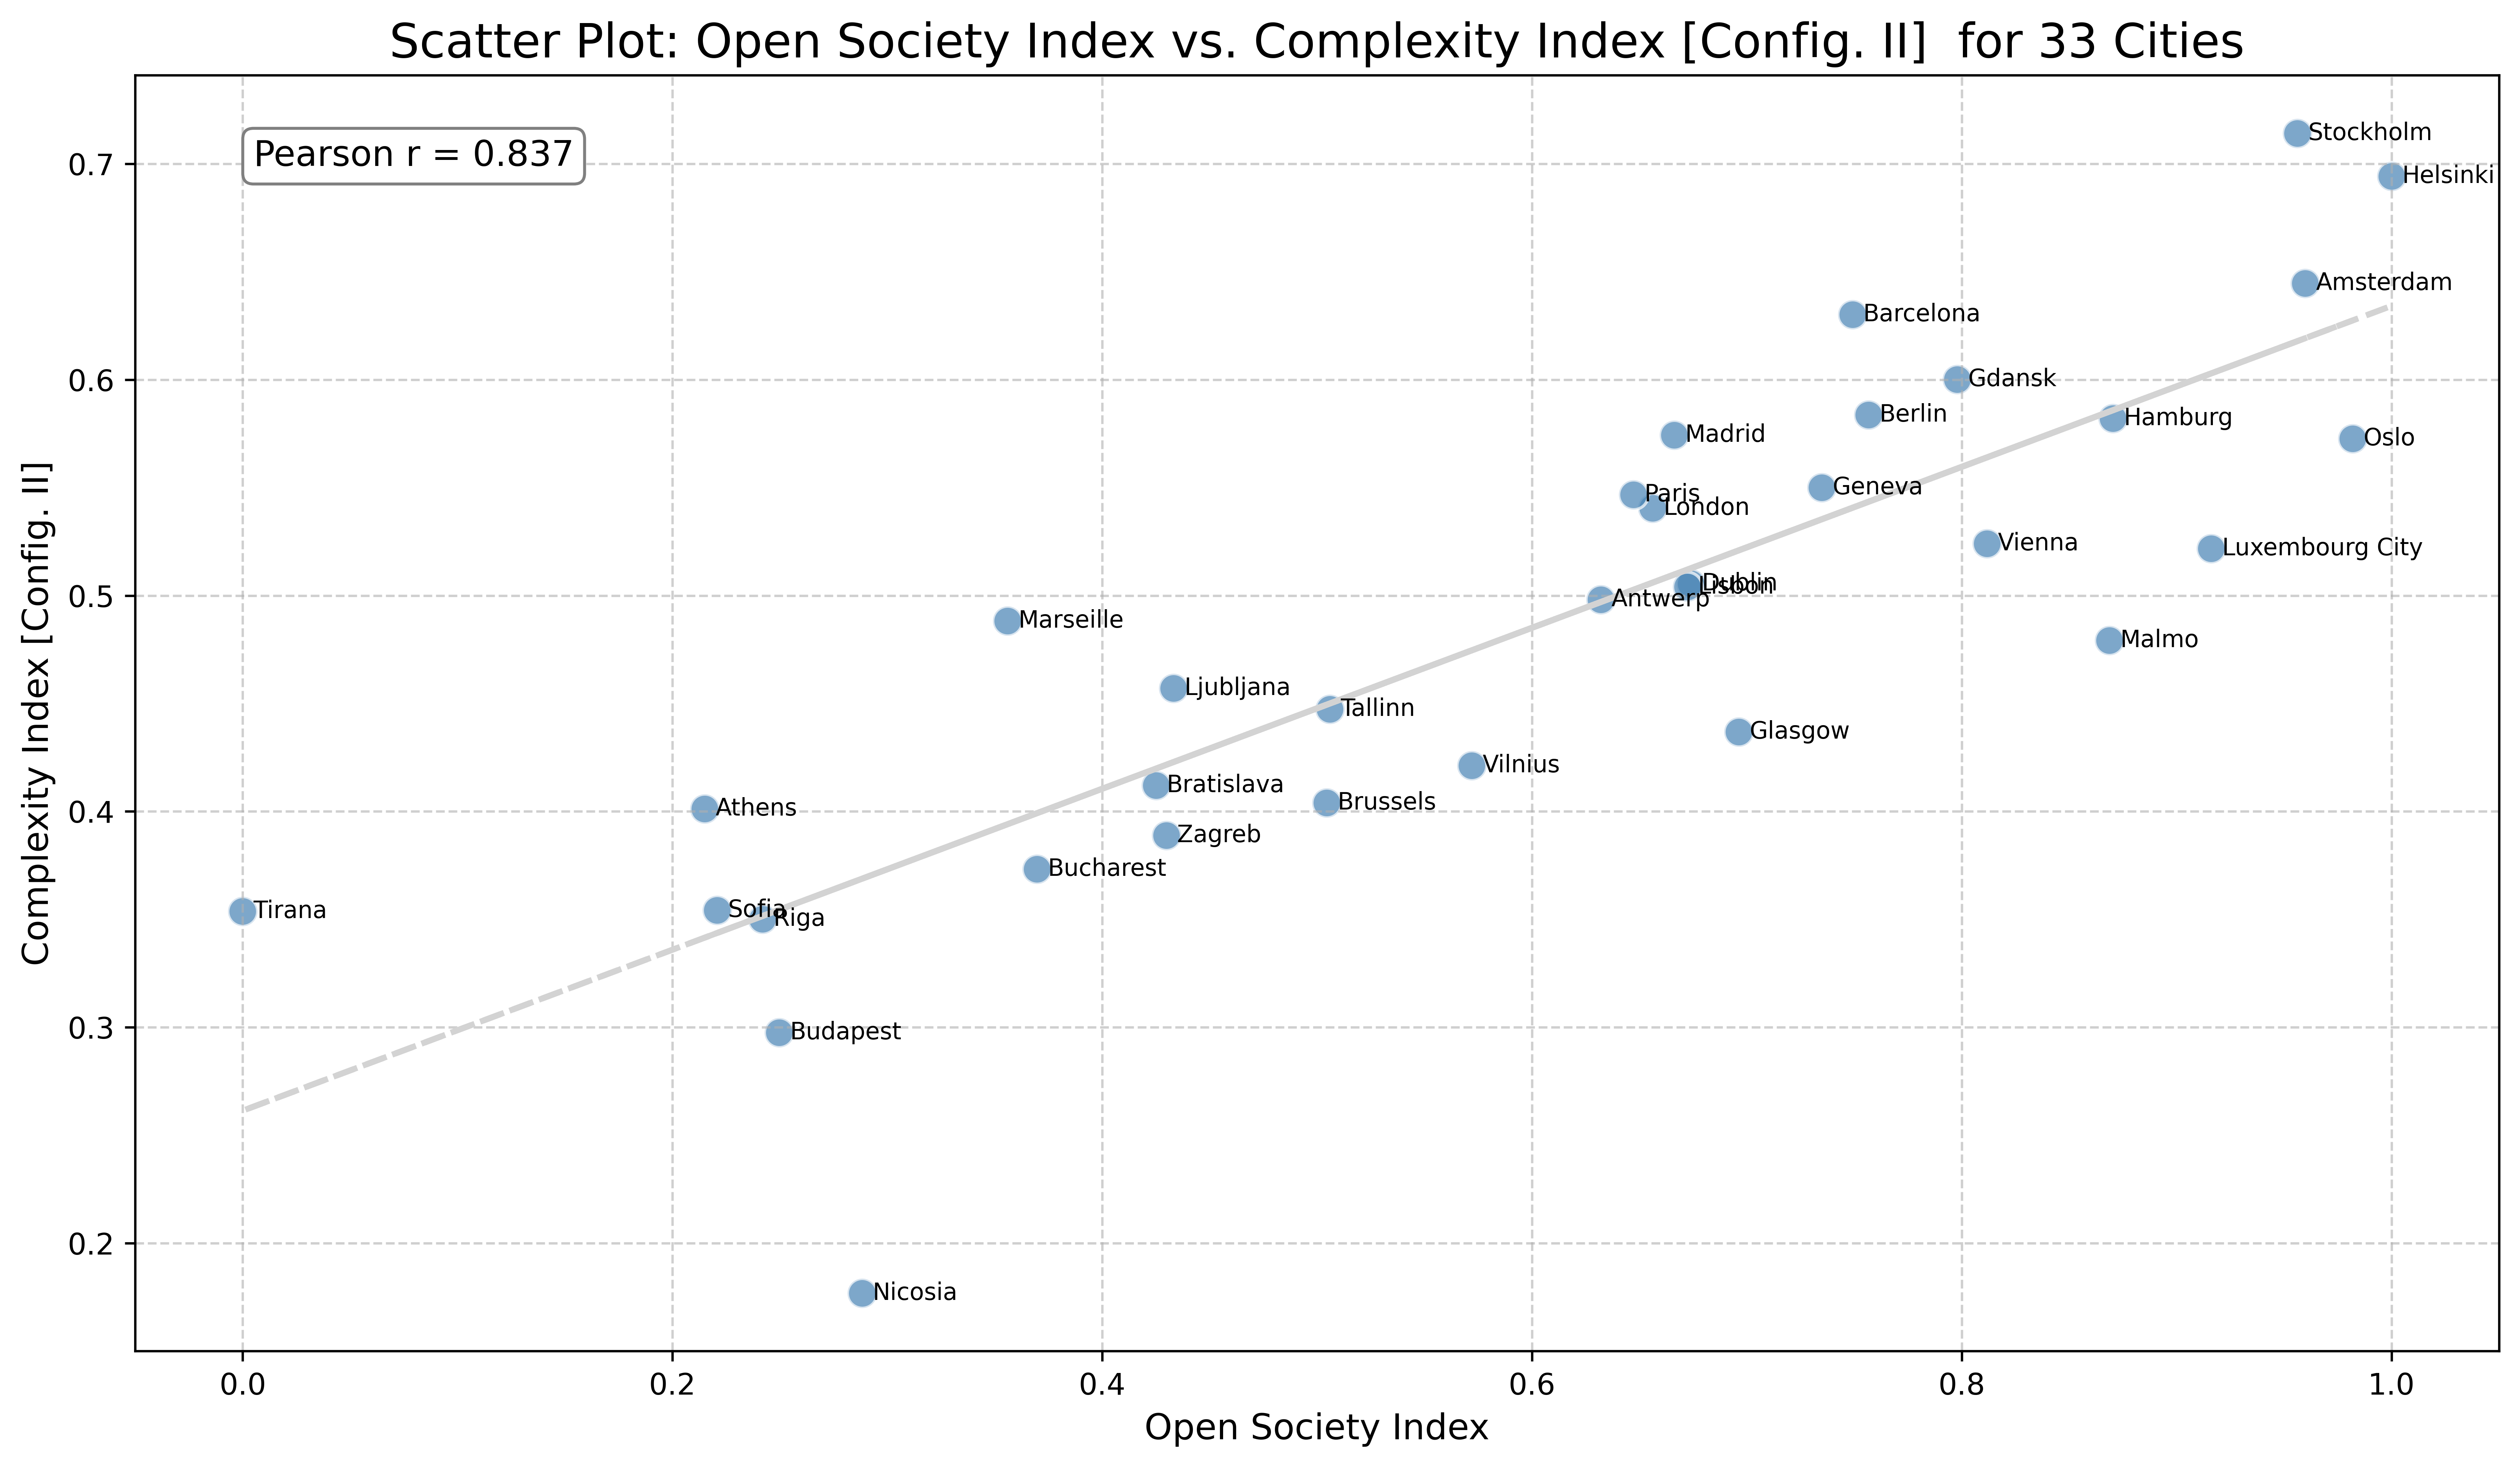

In [30]:
# Correlation Test and Scatter Plot
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

# SETTINGS
show_trendline = True  # Set to False if you do not want the regression line

# Data:
cities = [
    'Amsterdam', 'Antwerp', 'Athens', 'Barcelona', 'Berlin', 'Bratislava', 'Brussels',
    'Bucharest', 'Budapest', 'Dublin', 'Gdansk', 'Geneva', 'Glasgow',
    'Hamburg', 'Helsinki', 'Lisbon', 'Ljubljana', 'London', 'Luxembourg City', 'Madrid', 'Malmo',
    'Marseille', 'Nicosia', 'Oslo', 'Paris', 'Riga', 'Sofia', 'Stockholm', 'Tallinn',
    'Tirana', 'Vienna', 'Vilnius', 'Zagreb'
]

index_set_1 = [
    0.959874, 0.631962, 0.215030, 0.749152, 0.756605, 0.425012, 0.504494,
    0.369625, 0.249659, 0.673966, 0.797906, 0.734882, 0.696233,
    0.870318, 1.000000, 0.672256, 0.433168, 0.656221, 0.916135, 0.666203, 0.868774,
    0.355909, 0.288195, 0.981861, 0.647297, 0.241903, 0.220829, 0.956214,
    0.505974, 0.000000, 0.811807, 0.571982, 0.429900
]

index_set_2 = [
    0.644690, 0.498048, 0.401130, 0.630166, 0.583648, 0.412098, 0.404022,
    0.373311, 0.297552, 0.505517, 0.600100, 0.550088, 0.436858,
    0.582023, 0.694258, 0.503955, 0.457046, 0.540493, 0.521798, 0.574404, 0.479224,
    0.488259, 0.176792, 0.572626, 0.546815, 0.350107, 0.354154, 0.714232,
    0.447301, 0.353752, 0.524076, 0.421173, 0.388884
]

# Create DataFrame
df = pd.DataFrame({
    'City': cities,
    'Index Set 1': index_set_1,
    'Index Set 2': index_set_2
})

# Calculate Pearson correlation coefficient and p-value
corr_coefficient, p_value = pearsonr(df['Index Set 1'], df['Index Set 2'])

# Print results
print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'P-value: {p_value:.3e}')

# Optional trend line and regression formula
if show_trendline:
    x = df['Index Set 1']
    y = df['Index Set 2']
    z = np.polyfit(x, y, 1)
    slope, intercept = z[0], z[1]
    print(f'Linear regression formula: y = {slope:.3f}x + {intercept:.3f}')
    p_fn = np.poly1d(z)
else:
    p_fn = None

# Plotting
plt.figure(figsize=(12, 7), dpi=600)
plt.scatter(df['Index Set 1'], df['Index Set 2'], color='steelblue', alpha=0.7, edgecolors='white', s=100)

# Add city labels
for i, row in df.iterrows():
    plt.text(row['Index Set 1'] + 0.005, row['Index Set 2'], row['City'], fontsize=8, ha='left', va='center')

# Plot the trend line (if enabled)
if show_trendline and p_fn is not None:
    plt.plot(x, p_fn(x), color='lightgray', linewidth=2, linestyle='--')
cities
# Add only Pearson r to the plot
plt.annotate(f'Pearson r = {corr_coefficient:.3f}', xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, ha='left', va='top',
             bbox=dict(boxstyle='round', fc='white', ec='gray'))

# Final plot setup
plt.title('Scatter Plot: Open Society Index vs. Complexity Index [Config. II]  for 33 Cities', fontsize=16)
plt.xlabel('Open Society Index', fontsize=12)
plt.ylabel('Complexity Index [Config. II]', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
